# Alice_in_Wonderland_tokenization

*Display a histogram of the frequency of words in "Alice in Wonderland" text*

### Data Analysis with mapReduce

Let's create a histogram of the frequency of words in an extract from Alice in Wonderland. We want to know how often each word appears.

This is a typical use case for mapReduce.

Plan:

- tokenize the text
- clear of rare symbols
- remove stop words
- normalize rendering
- calculate the histogram
- normalize the histogram
- print it out

In [1]:
text = """
“I’m sure those are not the right words,” said poor Alice, and her eyes filled with tears again as she went on, “I must be Mabel after all, and I shall have to go and live in that poky little house, and have next to no toys to play with, and oh! ever so many lessons to learn! No, I’ve made up my mind about it; if I’m Mabel, I’ll stay down here! It’ll be no use their putting their heads down and saying ‘Come up again, dear!’ I shall only look up and say ‘Who am I then? Tell me that first, and then, if I like being that person, I’ll come up: if not, I’ll stay down here till I’m somebody else’—but, oh dear!” cried Alice, with a sudden burst of tears, “I do wish they would put their heads down! I am so very tired of being all alone here!”

As she said this she looked down at her hands, and was surprised to see that she had put on one of the Rabbit’s little white kid gloves while she was talking. “How can I have done that?” she thought. “I must be growing small again.” She got up and went to the table to measure herself by it, and found that, as nearly as she could guess, she was now about two feet high, and was going on shrinking rapidly: she soon found out that the cause of this was the fan she was holding, and she dropped it hastily, just in time to avoid shrinking away altogether.

“That was a narrow escape!” said Alice, a good deal frightened at the sudden change, but very glad to find herself still in existence; “and now for the garden!” and she ran with all speed back to the little door: but, alas! the little door was shut again, and the little golden key was lying on the glass table as before, “and things are worse than ever,” thought the poor child, “for I never was so small as this before, never! And I declare it’s too bad, that it is!”

As she said these words her foot slipped, and in another moment, splash! she was up to her chin in salt water. Her first idea was that she had somehow fallen into the sea, “and in that case I can go back by railway,” she said to herself. (Alice had been to the seaside once in her life, and had come to the general conclusion, that wherever you go to on the English coast you find a number of bathing machines in the sea, some children digging in the sand with wooden spades, then a row of lodging houses, and behind them a railway station.) However, she soon made out that she was in the pool of tears which she had wept when she was nine feet high.

“I wish I hadn’t cried so much!” said Alice, as she swam about, trying to find her way out. “I shall be punished for it now, I suppose, by being drowned in my own tears! That will be a queer thing, to be sure! However, everything is queer to-day.”

Just then she heard something splashing about in the pool a little way off, and she swam nearer to make out what it was: at first she thought it must be a walrus or hippopotamus, but then she remembered how small she was now, and she soon made out that it was only a mouse that had slipped in like herself.

“Would it be of any use, now,” thought Alice, “to speak to this mouse? Everything is so out-of-the-way down here, that I should think very likely it can talk: at any rate, there’s no harm in trying.” So she began: “O Mouse, do you know the way out of this pool? I am very tired of swimming about here, O Mouse!” (Alice thought this must be the right way of speaking to a mouse: she had never done such a thing before, but she remembered having seen in her brother’s Latin Grammar, “A mouse—of a mouse—to a mouse—a mouse—O mouse!”) The Mouse looked at her rather inquisitively, and seemed to her to wink with one of its little eyes, but it said nothing.

“Perhaps it doesn’t understand English,” thought Alice; “I daresay it’s a French mouse, come over with William the Conqueror.” (For, with all her knowledge of history, Alice had no very clear notion how long ago anything had happened.) So she began again: “Où est ma chatte?” which was the first sentence in her French lesson-book. The Mouse gave a sudden leap out of the water, and seemed to quiver all over with fright. “Oh, I beg your pardon!” cried Alice hastily, afraid that she had hurt the poor animal’s feelings. “I quite forgot you didn’t like cats.”

“Not like cats!” cried the Mouse, in a shrill, passionate voice. “Would you like cats if you were me?”

“Well, perhaps not,” said Alice in a soothing tone: “don’t be angry about it. And yet I wish I could show you our cat Dinah: I think you’d take a fancy to cats if you could only see her. She is such a dear quiet thing,” Alice went on, half to herself, as she swam lazily about in the pool, “and she sits purring so nicely by the fire, licking her paws and washing her face—and she is such a nice soft thing to nurse—and she’s such a capital one for catching mice—oh, I beg your pardon!” cried Alice again, for this time the Mouse was bristling all over, and she felt certain it must be really offended. “We won’t talk about her any more if you’d rather not.”

“We indeed!” cried the Mouse, who was trembling down to the end of his tail. “As if I would talk on such a subject! Our family always hated cats: nasty, low, vulgar things! Don’t let me hear the name again!”

“I won’t indeed!” said Alice, in a great hurry to change the subject of conversation. “Are you—are you fond—of—of dogs?” The Mouse did not answer, so Alice went on eagerly: “There is such a nice little dog near our house I should like to show you! A little bright-eyed terrier, you know, with oh, such long curly brown hair! And it’ll fetch things when you throw them, and it’ll sit up and beg for its dinner, and all sorts of things—I can’t remember half of them—and it belongs to a farmer, you know, and he says it’s so useful, it’s worth a hundred pounds! He says it kills all the rats and—oh dear!” cried Alice in a sorrowful tone, “I’m afraid I’ve offended it again!” For the Mouse was swimming away from her as hard as it could go, and making quite a commotion in the pool as it went.

So she called softly after it, “Mouse dear! Do come back again, and we won’t talk about cats or dogs either, if you don’t like them!” When the Mouse heard this, it turned round and swam slowly back to her: its face was quite pale (with passion, Alice thought), and it said in a low trembling voice, “Let us get to the shore, and then I’ll tell you my history, and you’ll understand why it is I hate cats and dogs.”

It was high time to go, for the pool was getting quite crowded with the birds and animals that had fallen into it: there were a Duck and a Dodo, a Lory and an Eaglet, and several other curious creatures. Alice led the way, and the whole party swam to the shore.

"""

In [10]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize

import matplotlib.pyplot as plt


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Cristina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cristina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
text_str = ''.join(text)
text_str

'\n“I’m sure those are not the right words,” said poor Alice, and her eyes filled with tears again as she went on, “I must be Mabel after all, and I shall have to go and live in that poky little house, and have next to no toys to play with, and oh! ever so many lessons to learn! No, I’ve made up my mind about it; if I’m Mabel, I’ll stay down here! It’ll be no use their putting their heads down and saying ‘Come up again, dear!’ I shall only look up and say ‘Who am I then? Tell me that first, and then, if I like being that person, I’ll come up: if not, I’ll stay down here till I’m somebody else’—but, oh dear!” cried Alice, with a sudden burst of tears, “I do wish they would put their heads down! I am so very tired of being all alone here!”\n\nAs she said this she looked down at her hands, and was surprised to see that she had put on one of the Rabbit’s little white kid gloves while she was talking. “How can I have done that?” she thought. “I must be growing small again.” She got up and w

In [3]:
tokenized_text=sent_tokenize(text_str) #tokenizamos el texto
print(tokenized_text)

['\n“I’m sure those are not the right words,” said poor Alice, and her eyes filled with tears again as she went on, “I must be Mabel after all, and I shall have to go and live in that poky little house, and have next to no toys to play with, and oh!', 'ever so many lessons to learn!', 'No, I’ve made up my mind about it; if I’m Mabel, I’ll stay down here!', 'It’ll be no use their putting their heads down and saying ‘Come up again, dear!’ I shall only look up and say ‘Who am I then?', 'Tell me that first, and then, if I like being that person, I’ll come up: if not, I’ll stay down here till I’m somebody else’—but, oh dear!” cried Alice, with a sudden burst of tears, “I do wish they would put their heads down!', 'I am so very tired of being all alone here!”\n\nAs she said this she looked down at her hands, and was surprised to see that she had put on one of the Rabbit’s little white kid gloves while she was talking.', '“How can I have done that?” she thought.', '“I must be growing small ag

In [4]:
tokenized_word=word_tokenize(text_str) #tokenizamos las palabras
print(tokenized_word)

['“', 'I', '’', 'm', 'sure', 'those', 'are', 'not', 'the', 'right', 'words', ',', '”', 'said', 'poor', 'Alice', ',', 'and', 'her', 'eyes', 'filled', 'with', 'tears', 'again', 'as', 'she', 'went', 'on', ',', '“', 'I', 'must', 'be', 'Mabel', 'after', 'all', ',', 'and', 'I', 'shall', 'have', 'to', 'go', 'and', 'live', 'in', 'that', 'poky', 'little', 'house', ',', 'and', 'have', 'next', 'to', 'no', 'toys', 'to', 'play', 'with', ',', 'and', 'oh', '!', 'ever', 'so', 'many', 'lessons', 'to', 'learn', '!', 'No', ',', 'I', '’', 've', 'made', 'up', 'my', 'mind', 'about', 'it', ';', 'if', 'I', '’', 'm', 'Mabel', ',', 'I', '’', 'll', 'stay', 'down', 'here', '!', 'It', '’', 'll', 'be', 'no', 'use', 'their', 'putting', 'their', 'heads', 'down', 'and', 'saying', '‘', 'Come', 'up', 'again', ',', 'dear', '!', '’', 'I', 'shall', 'only', 'look', 'up', 'and', 'say', '‘', 'Who', 'am', 'I', 'then', '?', 'Tell', 'me', 'that', 'first', ',', 'and', 'then', ',', 'if', 'I', 'like', 'being', 'that', 'person', ','

In [5]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word) #calculamos la frecuencia de palabras
print(fdist)

<FreqDist with 496 samples and 1623 outcomes>


In [6]:
fdist.most_common(50) #mostramos las 50 palabras más repetidas

[(',', 109),
 ('the', 44),
 ('and', 44),
 ('I', 39),
 ('she', 38),
 ('’', 37),
 ('“', 35),
 ('”', 35),
 ('to', 35),
 ('!', 33),
 ('a', 33),
 ('it', 30),
 ('was', 24),
 ('in', 23),
 ('.', 23),
 ('Alice', 18),
 ('of', 18),
 ('you', 18),
 ('her', 17),
 ('that', 17),
 (':', 14),
 ('with', 12),
 ('be', 11),
 ('had', 11),
 ('Mouse', 11),
 ('said', 10),
 ('as', 10),
 ('t', 10),
 ('little', 9),
 ('about', 9),
 ('s', 9),
 ('again', 8),
 ('on', 8),
 ('all', 8),
 ('so', 8),
 ('if', 8),
 ('ll', 8),
 ('this', 8),
 ('up', 7),
 ('down', 7),
 ('?', 7),
 ('like', 7),
 ('cried', 7),
 ('thought', 7),
 ('out', 7),
 ('for', 7),
 ('is', 7),
 ('such', 7),
 ('then', 6),
 ('pool', 6)]

In [7]:
new_text = re.sub("[.|,|;|:|!|?|(|)|-|_|’|“|”|‘]", "", text) #limpiamos el texto de símbolos

text_tokens = word_tokenize(new_text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()] #sacamos las stopwords

print(tokens_without_sw)

['Im', 'words', 'poor', 'Alice', 'eyes', 'filled', 'tears', 'I', 'Mabel', 'I', 'live', 'poky', 'house', 'toys', 'play', 'lessons', 'learn', 'No', 'Ive', 'made', 'mind', 'Im', 'Mabel', 'Ill', 'stay', 'Itll', 'putting', 'heads', 'Come', 'dear', 'I', 'Who', 'I', 'Tell', 'I', 'person', 'Ill', 'Ill', 'stay', 'Im', 'else—but', 'dear', 'cried', 'Alice', 'sudden', 'burst', 'tears', 'I', 'wish', 'put', 'heads', 'I', 'tired', 'As', 'looked', 'hands', 'surprised', 'put', 'Rabbits', 'white', 'kid', 'gloves', 'talking', 'How', 'I', 'I', 'growing', 'small', 'She', 'table', 'measure', 'found', 'guess', 'feet', 'high', 'shrinking', 'rapidly', 'found', 'holding', 'dropped', 'hastily', 'time', 'avoid', 'shrinking', 'away', 'altogether', 'That', 'narrow', 'escape', 'Alice', 'deal', 'frightened', 'sudden', 'change', 'glad', 'find', 'existence', 'garden', 'ran', 'speed', 'back', 'alas', 'shut', 'golden', 'key', 'lying', 'glass', 'table', 'things', 'worse', 'poor', 'child', 'I', 'small', 'And', 'I', 'declar

In [8]:
fdist_stopwords = FreqDist(tokens_without_sw) #calculamos la frecuencia de palabras sin stopwords
print(fdist_stopwords)

<FreqDist with 298 samples and 482 outcomes>


In [9]:
fdist_stopwords.most_common(50) #mostramos las 50 palabras más repetidas sin stopwords

[('I', 29),
 ('Alice', 18),
 ('Mouse', 11),
 ('cried', 7),
 ('cats', 7),
 ('pool', 6),
 ('dear', 5),
 ('swam', 5),
 ('mouse', 5),
 ('Im', 4),
 ('tears', 4),
 ('Ill', 4),
 ('back', 4),
 ('talk', 4),
 ('poor', 3),
 ('made', 3),
 ('sudden', 3),
 ('wish', 3),
 ('As', 3),
 ('small', 3),
 ('high', 3),
 ('time', 3),
 ('find', 3),
 ('things', 3),
 ('And', 3),
 ('So', 3),
 ('The', 3),
 ('beg', 3),
 ('dogs', 3),
 ('words', 2),
 ('eyes', 2),
 ('Mabel', 2),
 ('house', 2),
 ('Ive', 2),
 ('stay', 2),
 ('heads', 2),
 ('put', 2),
 ('tired', 2),
 ('looked', 2),
 ('She', 2),
 ('table', 2),
 ('found', 2),
 ('feet', 2),
 ('shrinking', 2),
 ('hastily', 2),
 ('away', 2),
 ('That', 2),
 ('change', 2),
 ('slipped', 2),
 ('water', 2)]

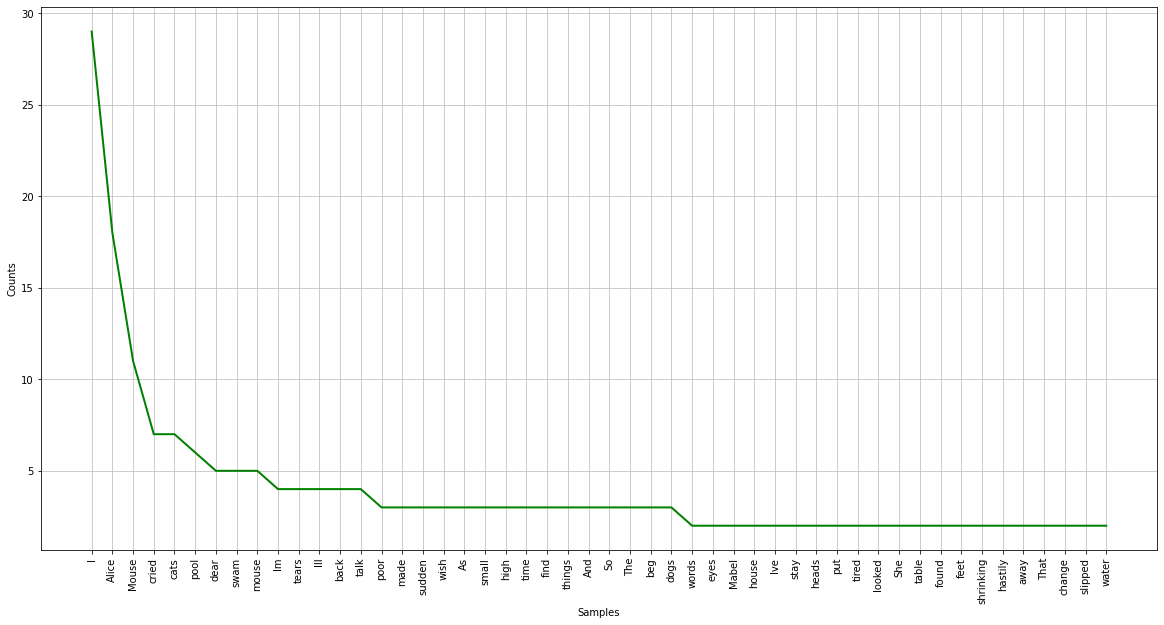

In [12]:
fig = plt.figure(figsize = (20,10)) 
fdist_stopwords.plot(50,cumulative=False, color = "green")
plt.show() #mostramos el histograma